In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
### applying LDA on "description"
import pandas as pd

df=pd.read_csv("C:/Users/USER/Desktop/660 project/data/data.csv",header=0)

All_text=df['descripton']
label=df['state']

## Find the best number of topics(K)

In [3]:
# Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 

# initial LDA model, and add more words in stopwords 
tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words=text.ENGLISH_STOP_WORDS.union(["00", "10","ve","ll","la","et","000"]))

tf = tf_vectorizer.fit_transform(All_text)

tf_feature_names = tf_vectorizer.get_feature_names()

# split dataset into train (80%) and test sets (20%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.2, random_state=0)

In [13]:
# find the best number of topics(K) which has min perplexity
# result shows that 12 groups has min perplexity
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,15):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=10,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)

2 3990.635957387688
3 3749.4202261642545
4 3686.752443607714
5 3625.27500455111
6 3595.1489314882488
7 3534.1486442287387
8 3477.3341299146614
9 3466.38408920332
10 3459.619286545363
11 3473.4596718616112
12 3424.7615210791832
13 3458.280400819479
14 3446.342148357967


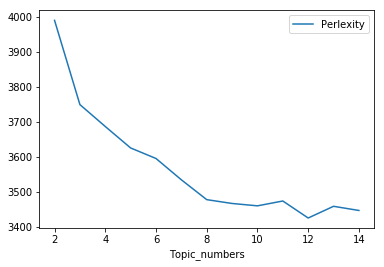

In [40]:
## find K through graph
## Kickstarter categorize topics into 8 group
import pandas as pd
pd.DataFrame(result, columns=["Topic_numbers", "Perlexity"]).plot.line(x='Topic_numbers',y="Perlexity");
plt.savefig("Topic_numbers.png")
plt.show();

## Use gensim package to visualize topic

In [10]:
# 5.1. Create LDA model using the same TF matrix generated from sklearn

import gensim
from gensim import corpora

# convert the gensim corpus from the sparse tf matrix
corpus = gensim.matutils.Sparse2Corpus(X_train, \
                            documents_columns=False) 

# create the mapping between id and words
id2word={idx:w for idx, w in \
         enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, \
                            id2word=id2word)


C:\Users\USER\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
# Train LDA model

NUM_TOPICS =12 

ldamodel = gensim.models.\
ldamodel.LdaModel(corpus, alpha='asymmetric',\
                            num_topics = NUM_TOPICS, \
                            id2word=id2word, \
                            iterations=10)

## Create interactive topic model visualization 

In [13]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_display, 'lda_display0.html')

C:\Users\USER\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


## Create word cloud

In [14]:
# Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 12

lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=10,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 10, perplexity: 3278.5582
iteration: 2 of max_iter: 10, perplexity: 3245.8822
iteration: 3 of max_iter: 10, perplexity: 3234.1657
iteration: 4 of max_iter: 10, perplexity: 3227.9989
iteration: 5 of max_iter: 10, perplexity: 3224.2683
iteration: 6 of max_iter: 10, perplexity: 3221.6517
iteration: 7 of max_iter: 10, perplexity: 3219.5617
iteration: 8 of max_iter: 10, perplexity: 3217.7818
iteration: 9 of max_iter: 10, perplexity: 3216.2504
iteration: 10 of max_iter: 10, perplexity: 3214.9285


In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(4, 3, figsize=(15, 15));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/3), topic_idx%3].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/3), topic_idx%3].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/3), topic_idx%3].axis('off')

plt.tight_layout()
plt.savefig("wordcloud.png")
plt.show()

<Figure size 1500x1500 with 12 Axes>

## Build topic distribution for each Kickstarter project.
## The result is used for predicting model.

In [4]:
# take the tf from above for gensim pckage
import gensim
from gensim import corpora

corpus = gensim.matutils.Sparse2Corpus(tf, documents_columns=False) 

# create the mapping between id and words
id2word={idx:w for idx, w in \
         enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, \
                            id2word=id2word)



C:\Users\USER\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
# 6.2. Train LDA model

NUM_TOPICS = 12

ldamodel_fordoc = gensim.models.ldamodel.LdaModel(corpus, alpha='asymmetric',\
                            num_topics = NUM_TOPICS, \
                            id2word=id2word, \
                            iterations=15)

In [7]:
## get project's topic distribution list
test_corpus = gensim.matutils.Sparse2Corpus(tf, documents_columns=False)
predict = ldamodel_fordoc.get_document_topics(test_corpus)
p_plst=list(predict) 


In [8]:
## check the length
len(p_plst)

52651

In [9]:
p_plst[0:5]

[[(0, 0.08726842), (1, 0.6123161), (10, 0.283533)],
 [(1, 0.58133125), (3, 0.020626), (7, 0.05608953), (10, 0.33435524)],
 [(0, 0.010578479), (1, 0.5748223), (3, 0.28805843), (7, 0.09551084)],
 [(1, 0.3658143), (3, 0.03425653), (7, 0.46360824), (10, 0.10755577)],
 [(1, 0.042126168), (7, 0.018328674), (10, 0.9311191)]]

In [11]:
x=[] #get all tuples of distribution for each project 
log=[] #track topic
d={}
tlist=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for doc in p_plst:
    for i in doc:
        d[i[0]]=i[1]
        log.append(i[0])
        for t in tlist:
            if t not in log:
                d[t]=0
    x.append((d[0], d[1], d[2], d[3], d[4], d[5], d[6], d[7],d[8], d[9], d[10], d[11]))    
    log=[]
    d={}
print(x[0:5])

[(0.08726842, 0.6123161, 0, 0, 0, 0, 0, 0, 0, 0, 0.283533, 0), (0, 0.58133125, 0, 0.020626, 0, 0, 0, 0.05608953, 0, 0, 0.33435524, 0), (0.010578479, 0.5748223, 0, 0.28805843, 0, 0, 0, 0.09551084, 0, 0, 0, 0), (0, 0.3658143, 0, 0.03425653, 0, 0, 0, 0.46360824, 0, 0, 0.10755577, 0), (0, 0.042126168, 0, 0, 0, 0, 0, 0.018328674, 0, 0, 0.9311191, 0)]


In [12]:
# Create a dataframe from the list of tuples 
y=pd.DataFrame(x, columns=['group_1', 'group_2', 'group_3', 'group_4','group_5', 'group_6', 'group_7',\
                           'group_8','group_9', 'group_10', 'group_11', 'group_12'])


In [13]:
y.head()
y.shape

,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12
0,0.087268,0.612316,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.283533,0.0
1,0.000000,0.581331,0.0,0.020626,0.0,0.0,0.0,0.056090,0.0,0.0,0.334355,0.0
2,0.010578,0.574822,0.0,0.288058,0.0,0.0,0.0,0.095511,0.0,0.0,0.000000,0.0
3,0.000000,0.365814,0.0,0.034257,0.0,0.0,0.0,0.463608,0.0,0.0,0.107556,0.0
4,0.000000,0.042126,0.0,0.000000,0.0,0.0,0.0,0.018329,0.0,0.0,0.931119,0.0


(52651, 12)

In [14]:
## save the result to csv for latter use( predict Kickstarter's suceess)
y.to_csv("C:/Users/USER/Desktop/docTopDist.csv", header=True, index=False)